In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [12]:
# 1) Загрузка данных
train_path = "D:/Эстер/с рс/Courses/ML Engineer/HWEster20/archive/train.csv"
df = pd.read_csv(train_path)

Age                      18705
Annual Income            44949
Marital Status           18529
Number of Dependents    109672
Occupation              358075
Health Score             74076
Previous Claims         364029
Vehicle Age                  6
Credit Score            137882
Insurance Duration           1
Customer Feedback        77824
dtype: int64

,count,mean,std,min,25%,50%,75%,max,missing_ratio
id,1200000.0,599999.500000,346410.305851,0.000000,299999.750000,599999.500000,899999.250000,1.199999e+06,0.000000e+00
Age,1181295.0,41.145563,13.539950,18.000000,30.000000,41.000000,53.000000,6.400000e+01,1.558750e-02
Annual Income,1155051.0,32745.217777,32179.506124,1.000000,8001.000000,23911.000000,44634.000000,1.499970e+05,3.745750e-02
Number of Dependents,1090328.0,2.009934,1.417338,0.000000,1.000000,2.000000,3.000000,4.000000e+00,9.139333e-02
Health Score,1125924.0,25.613908,12.203462,2.012237,15.918959,24.578648,34.527209,5.897591e+01,6.173000e-02
Previous Claims,835971.0,1.002689,0.982840,0.000000,0.000000,1.000000,2.000000,9.000000e+00,3.033575e-01
Vehicle Age,1199994.0,9.569889,5.776189,0.000000,5.000000,10.000000,15.000000,1.900000e+01,5.000000e-06
Credit Score,1062118.0,592.924350,149.981945,300.000000,468.000000,595.000000,721.000000,8.490000e+02,1.149017e-01
Insurance Duration,1199999.0,5.018219,2.594331,1.000000,3.000000,5.000000,7.000000,9.000000e+00,8.333333e-07
Premium Amount,1200000.0,1102.544822,864.998859,20.000000,514.000000,872.000000,1509.000000,4.999000e+03,0.000000e+00


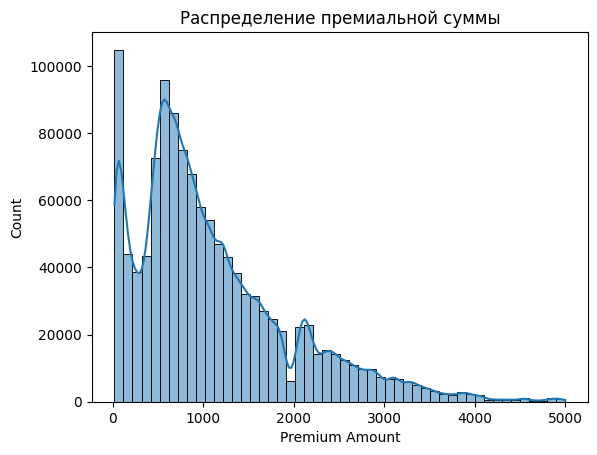

In [13]:
# 2) EDA (исследовательский анализ данных)
# Проверим пропуски в данных
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
display(missing_values)

# Рассчитаем основные статистики
summary_stats = df.describe().T
summary_stats['missing_ratio'] = df.isnull().mean()
display(summary_stats)

# Визуализируем распределение целевой переменной (Premium Amount)
sns.histplot(df['Premium Amount'], bins=50, kde=True)
plt.title("Распределение премиальной суммы")
plt.show()

In [14]:
# 3) Предобработка данных
# Удалим ненужные признаки, такие как ID и Policy Start Date (слишком много уникальных значений)
df.drop(columns=['id', 'Policy Start Date'], inplace=True)

# Кодируем категориальные переменные через one-hot encoding
df = pd.get_dummies(df, drop_first=True)

# Разделяем данные на признаки и целевую переменную
X = df.drop(columns=['Premium Amount'])
y = df['Premium Amount']

# Разделяем на тренировочный и тестовый набор
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
# 4) Обучение модели Decision Tree
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [16]:
# 5) Оценка качества модели
y_pred = regressor.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R^2: {r2}")

MAE: 898.78785
MSE: 1525608.9911
RMSE: 1235.1554522002484
R^2: -1.0415340793768517


In [17]:
# 6) Подбор гиперпараметров через GridSearchCV
param_grid = {
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5, 10]
}

grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Лучшая модель и ее параметры
best_model = grid_search.best_estimator_
print("Лучшие параметры:", grid_search.best_params_)


Лучшие параметры: {'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 2}


In [18]:
# Обучаем модель с лучшими параметрами
best_dt_regressor = DecisionTreeRegressor(**grid_search.best_params_, random_state=42)
best_dt_regressor.fit(X_train, y_train)

# Предсказываем на тестовой выборке
y_pred_best = best_dt_regressor.predict(X_test)

# Пересчитываем метрики для улучшенной модели
mae_best = mean_absolute_error(y_test, y_pred_best)
mse_best = mean_squared_error(y_test, y_pred_best)
rmse_best = np.sqrt(mse_best)
r2_best = r2_score(y_test, y_pred_best)

# Выводим новые результаты
print(f"Оптимизированная модель - MAE: {mae_best:.2f}")
print(f"Оптимизированная модель - MSE: {mse_best:.2f}")
print(f"Оптимизированная модель - RMSE: {rmse_best:.2f}")
print(f"Оптимизированная модель - R²: {r2_best:.4f}")

Оптимизированная модель - MAE: 643.07
Оптимизированная модель - MSE: 718775.87
Оптимизированная модель - RMSE: 847.81
Оптимизированная модель - R²: 0.0382
